<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [37]:
import pandas as pd

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Filter for movies from the 1990s
movies_1990s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] < 2000)]

# Calculate the most frequent movie duration
most_frequent_duration = movies_1990s['duration'].mode()[0]



# Output the results
print("Most frequent movie duration in the 1990s:", most_frequent_duration)



Most frequent movie duration in the 1990s: 94


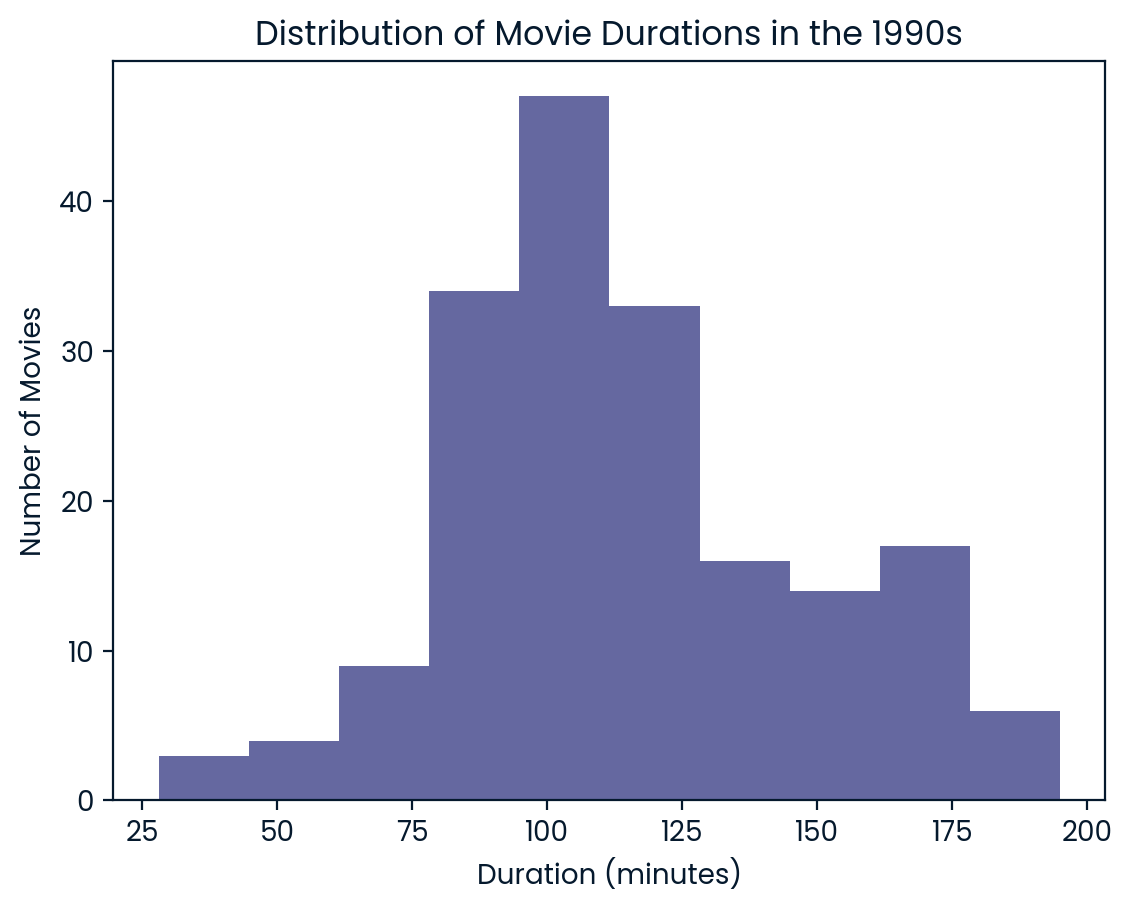

7


In [38]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Filter the to keep only movies released in the 1990s
# Start by filtering out movies that were released before 1990
subset = netflix_subset[(netflix_subset["release_year"] >= 1990)]

# And then do the same to filter out movies released on or after 2000
movies_1990s = subset[(subset["release_year"] < 2000)]

# Another way to do this step is to use the & operator which allows you to do this type of filtering in one step
# movies_1990s = netflix_subset[(netflix_subset["release_year"] >= 1990) & (netflix_subset["release_year"] < 2000)]

# Visualize the duration column of your filtered data to see the distribution of movie durations
# See which bar is the highest and save the duration value, this doesn't need to be exact!
plt.hist(movies_1990s["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

duration = 100

# Filter the data again to keep only the Action movies
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]

# Use a for loop and a counter to count how many short action movies there were in the 1990s

# Start the counter
short_movie_count = 0

# Iterate over the labels and rows of the DataFrame and check if the duration is less than 90, if it is, add 1 to the counter, if it isn't, the counter should remain the same
for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

# A quicker way of counting values in a column is to use .sum() on the desired column
# (action_movies_1990s["duration"] < 90).sum()

In [39]:
# Start coding here! Use as many cells as you import pandas as pd

# Load the data
netflix_df = pd.read_csv("netflix_data.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(netflix_df.head())

# Display dataset information and summary statistics
print("\nDataset Information:")
print(netflix_df.info())

print("\nSummary Statistics:")
print(netflix_df.describe(include='all'))


First few rows of the dataset:
  show_id  ...             genre
0      s2  ...            Dramas
1      s3  ...     Horror Movies
2      s4  ...            Action
3      s5  ...            Dramas
4      s6  ...  International TV

[5 rows x 11 columns]

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None

Summary Statist

Analyze Movie Durations


Missing values in 'duration': 0


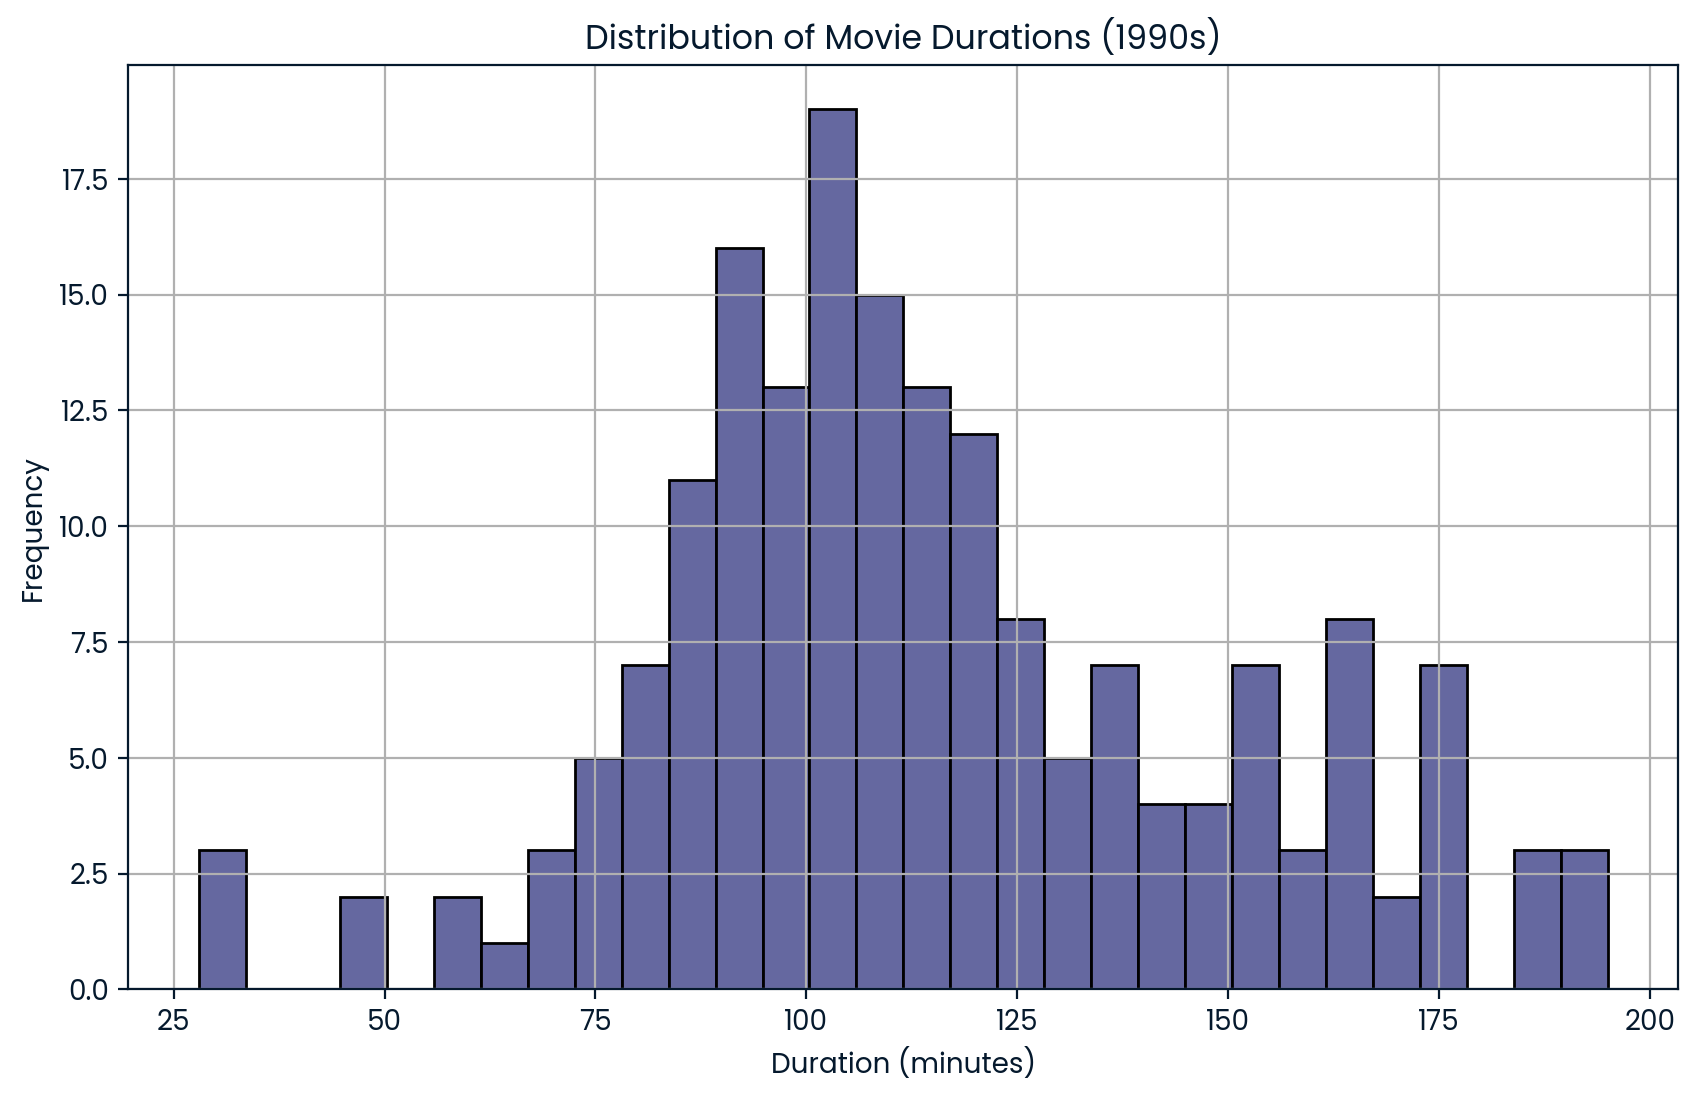


Most frequent movie duration in the 1990s: 94


In [40]:
import matplotlib.pyplot as plt

# Check for missing values in 'duration' column
print("\nMissing values in 'duration':", movies_1990s['duration'].isnull().sum())

# Fill missing values with the median duration
movies_1990s['duration'].fillna(movies_1990s['duration'].median(), inplace=True)

# Calculate the most frequent movie duration
most_frequent_duration = movies_1990s['duration'].mode()[0]

# Plot the distribution of movie durations
plt.figure(figsize=(10, 6))
plt.hist(movies_1990s['duration'], bins=30, edgecolor='black')
plt.title('Distribution of Movie Durations (1990s)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("\nMost frequent movie duration in the 1990s:", most_frequent_duration)


Analyze Short Action Movies

In [41]:
# Define a function to check if a genre contains 'Action'
def is_action(genre):
    return 'Action' in genre if pd.notna(genre) else False

# Apply the function to filter short action movies
movies_1990s['is_action'] = movies_1990s['genre'].apply(is_action)
short_action_movies = movies_1990s[(movies_1990s['is_action']) & (movies_1990s['duration'] < 90)]

# Count short action movies
short_movie_count = short_action_movies.shape[0]

print("\nNumber of short action movies from the 1990s:", short_movie_count)



Number of short action movies from the 1990s: 7


Visualize Key Insights

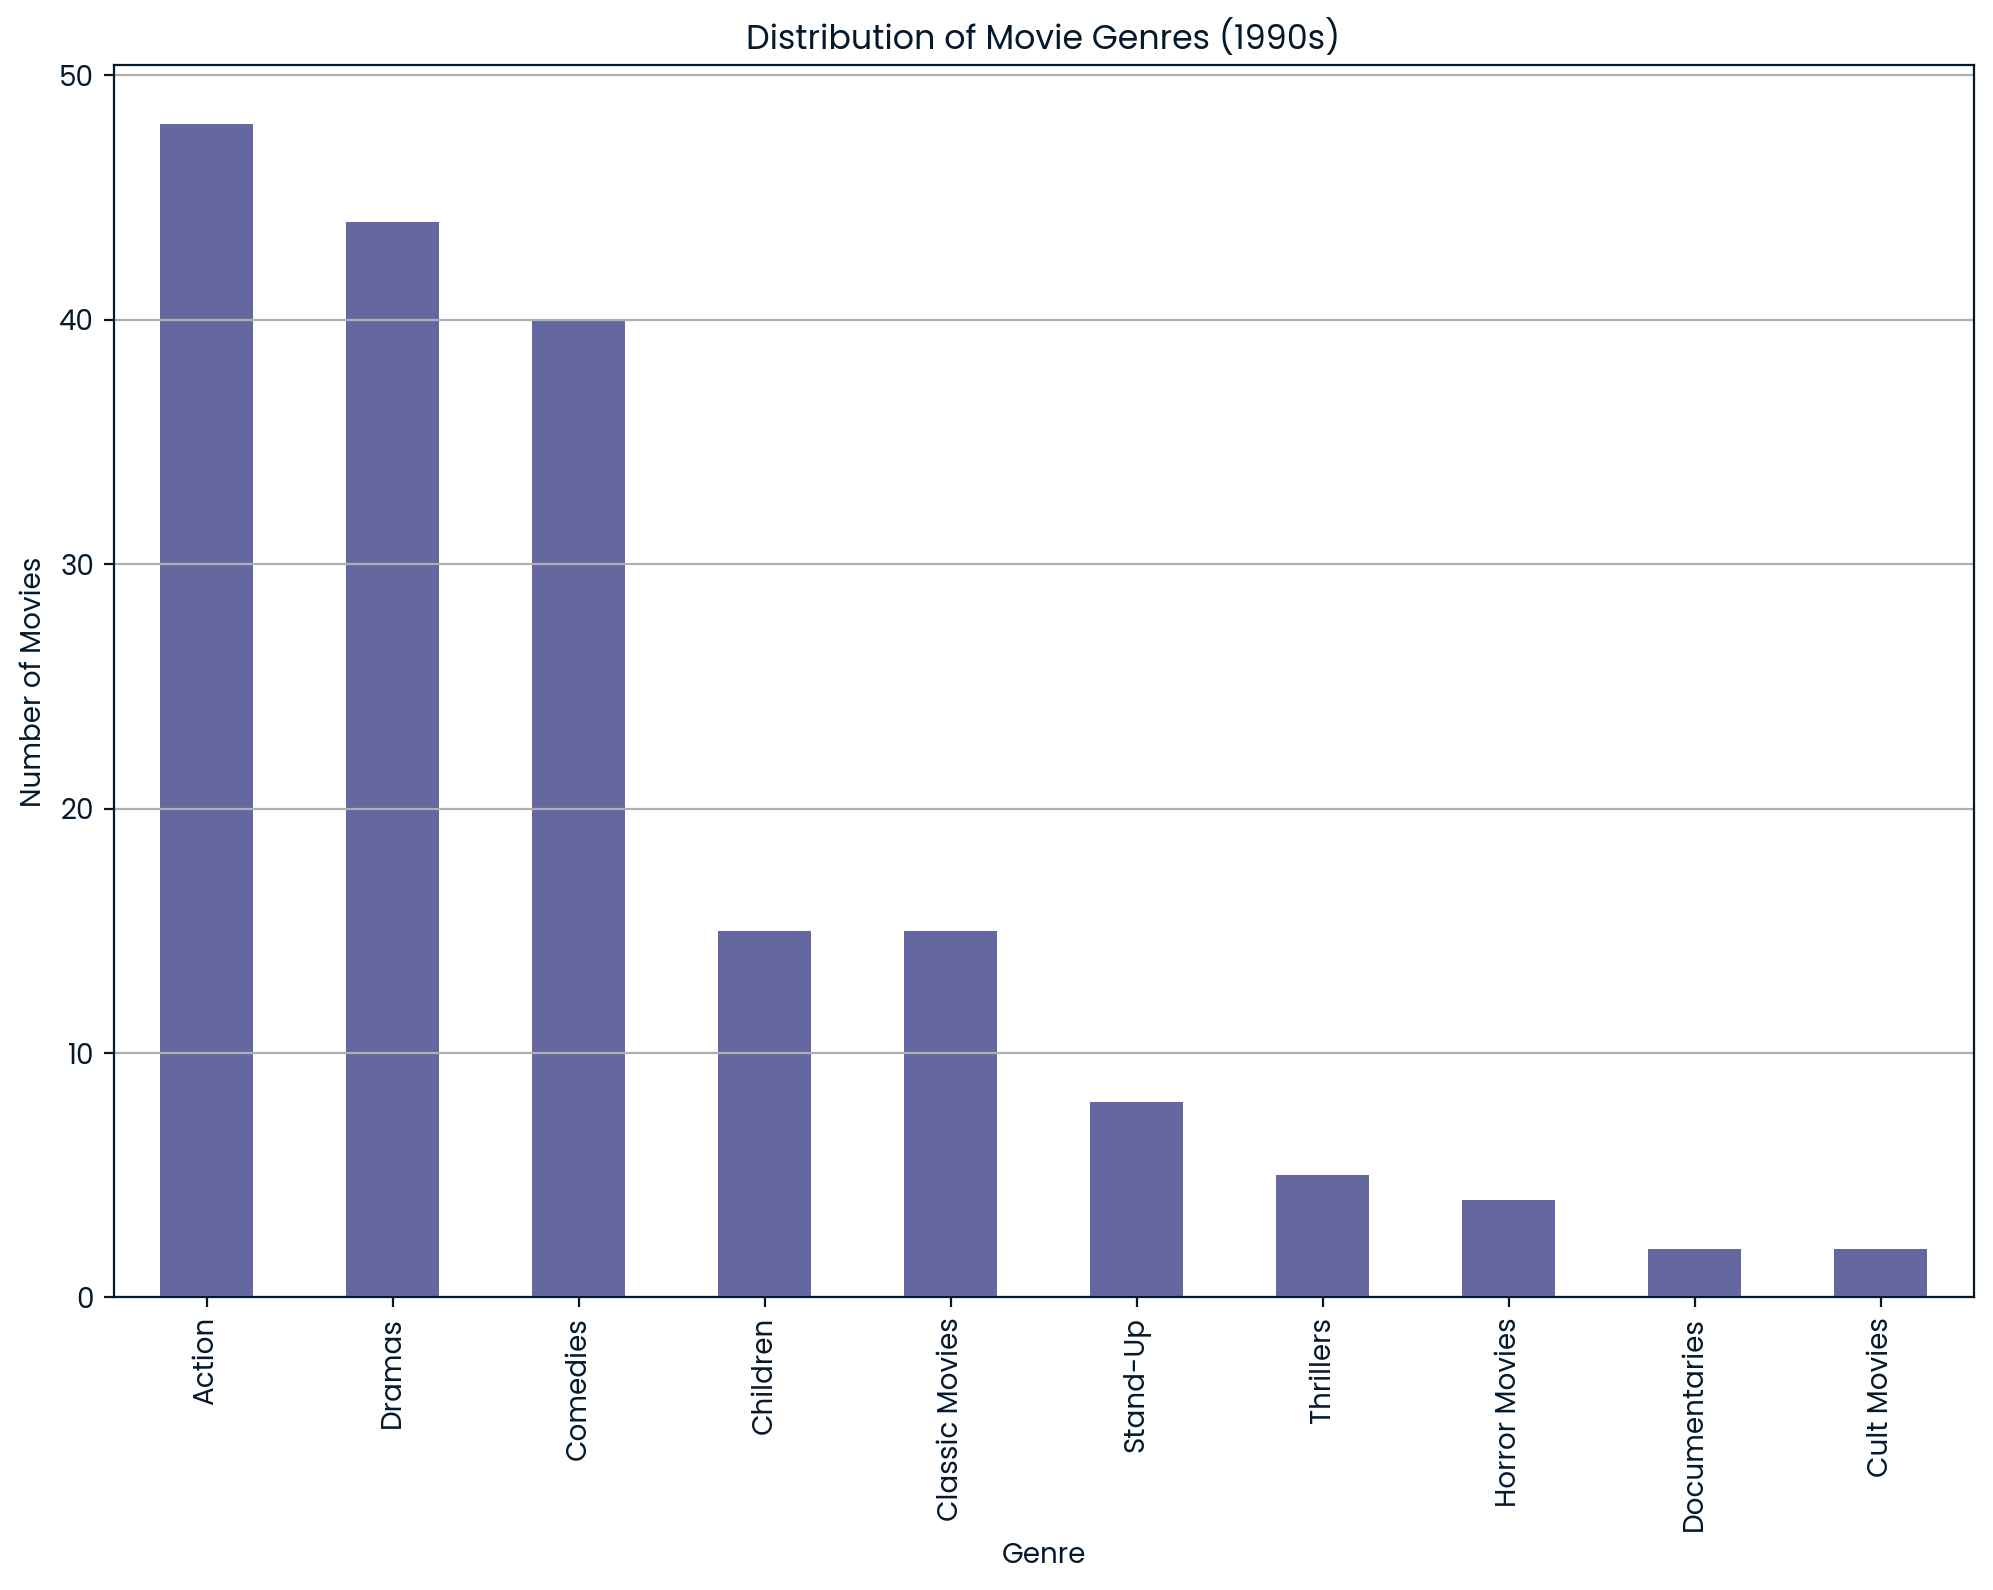

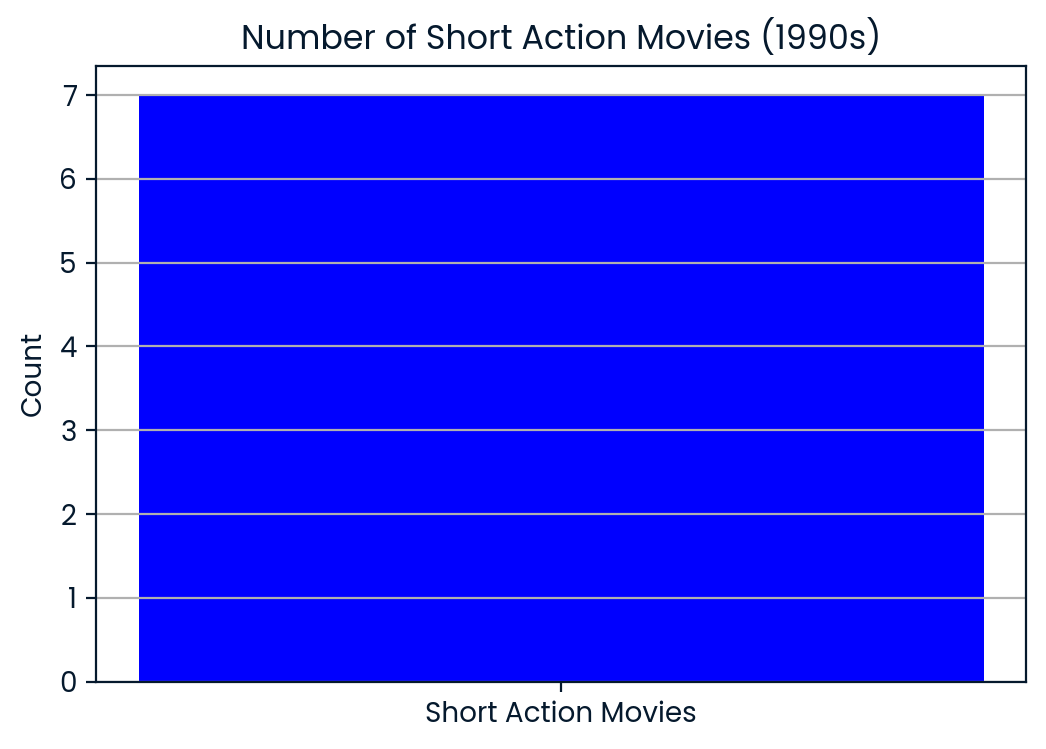

In [42]:
# Plot the distribution of genres in the 1990s
genre_counts = movies_1990s['genre'].value_counts()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres (1990s)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Plot the number of short action movies
plt.figure(figsize=(6, 4))
plt.bar(['Short Action Movies'], [short_movie_count], color='blue')
plt.title('Number of Short Action Movies (1990s)')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


Detailed Duration Analysis


Duration statistics by genre:
                count        mean        std  ...    50%     75%    max
genre                                         ...                      
Action           48.0  120.145833  28.799372  ...  112.5  136.50  191.0
Children         15.0   93.066667  17.958152  ...   89.0   98.50  142.0
Classic Movies   15.0  128.733333  32.305388  ...  118.0  144.00  195.0
Comedies         40.0  110.700000  30.664604  ...  105.5  117.25  185.0
Cult Movies       2.0  100.000000   1.414214  ...  100.0  100.50  101.0
Documentaries     2.0   72.000000  32.526912  ...   72.0   83.50   95.0
Dramas           44.0  132.045455  31.223839  ...  130.5  155.75  189.0
Horror Movies     4.0  104.750000  11.086779  ...  101.0  106.00  121.0
Stand-Up          8.0   53.250000  16.490257  ...   58.5   63.75   71.0
Thrillers         5.0  109.200000  11.388591  ...  107.0  116.00  124.0

[10 rows x 8 columns]


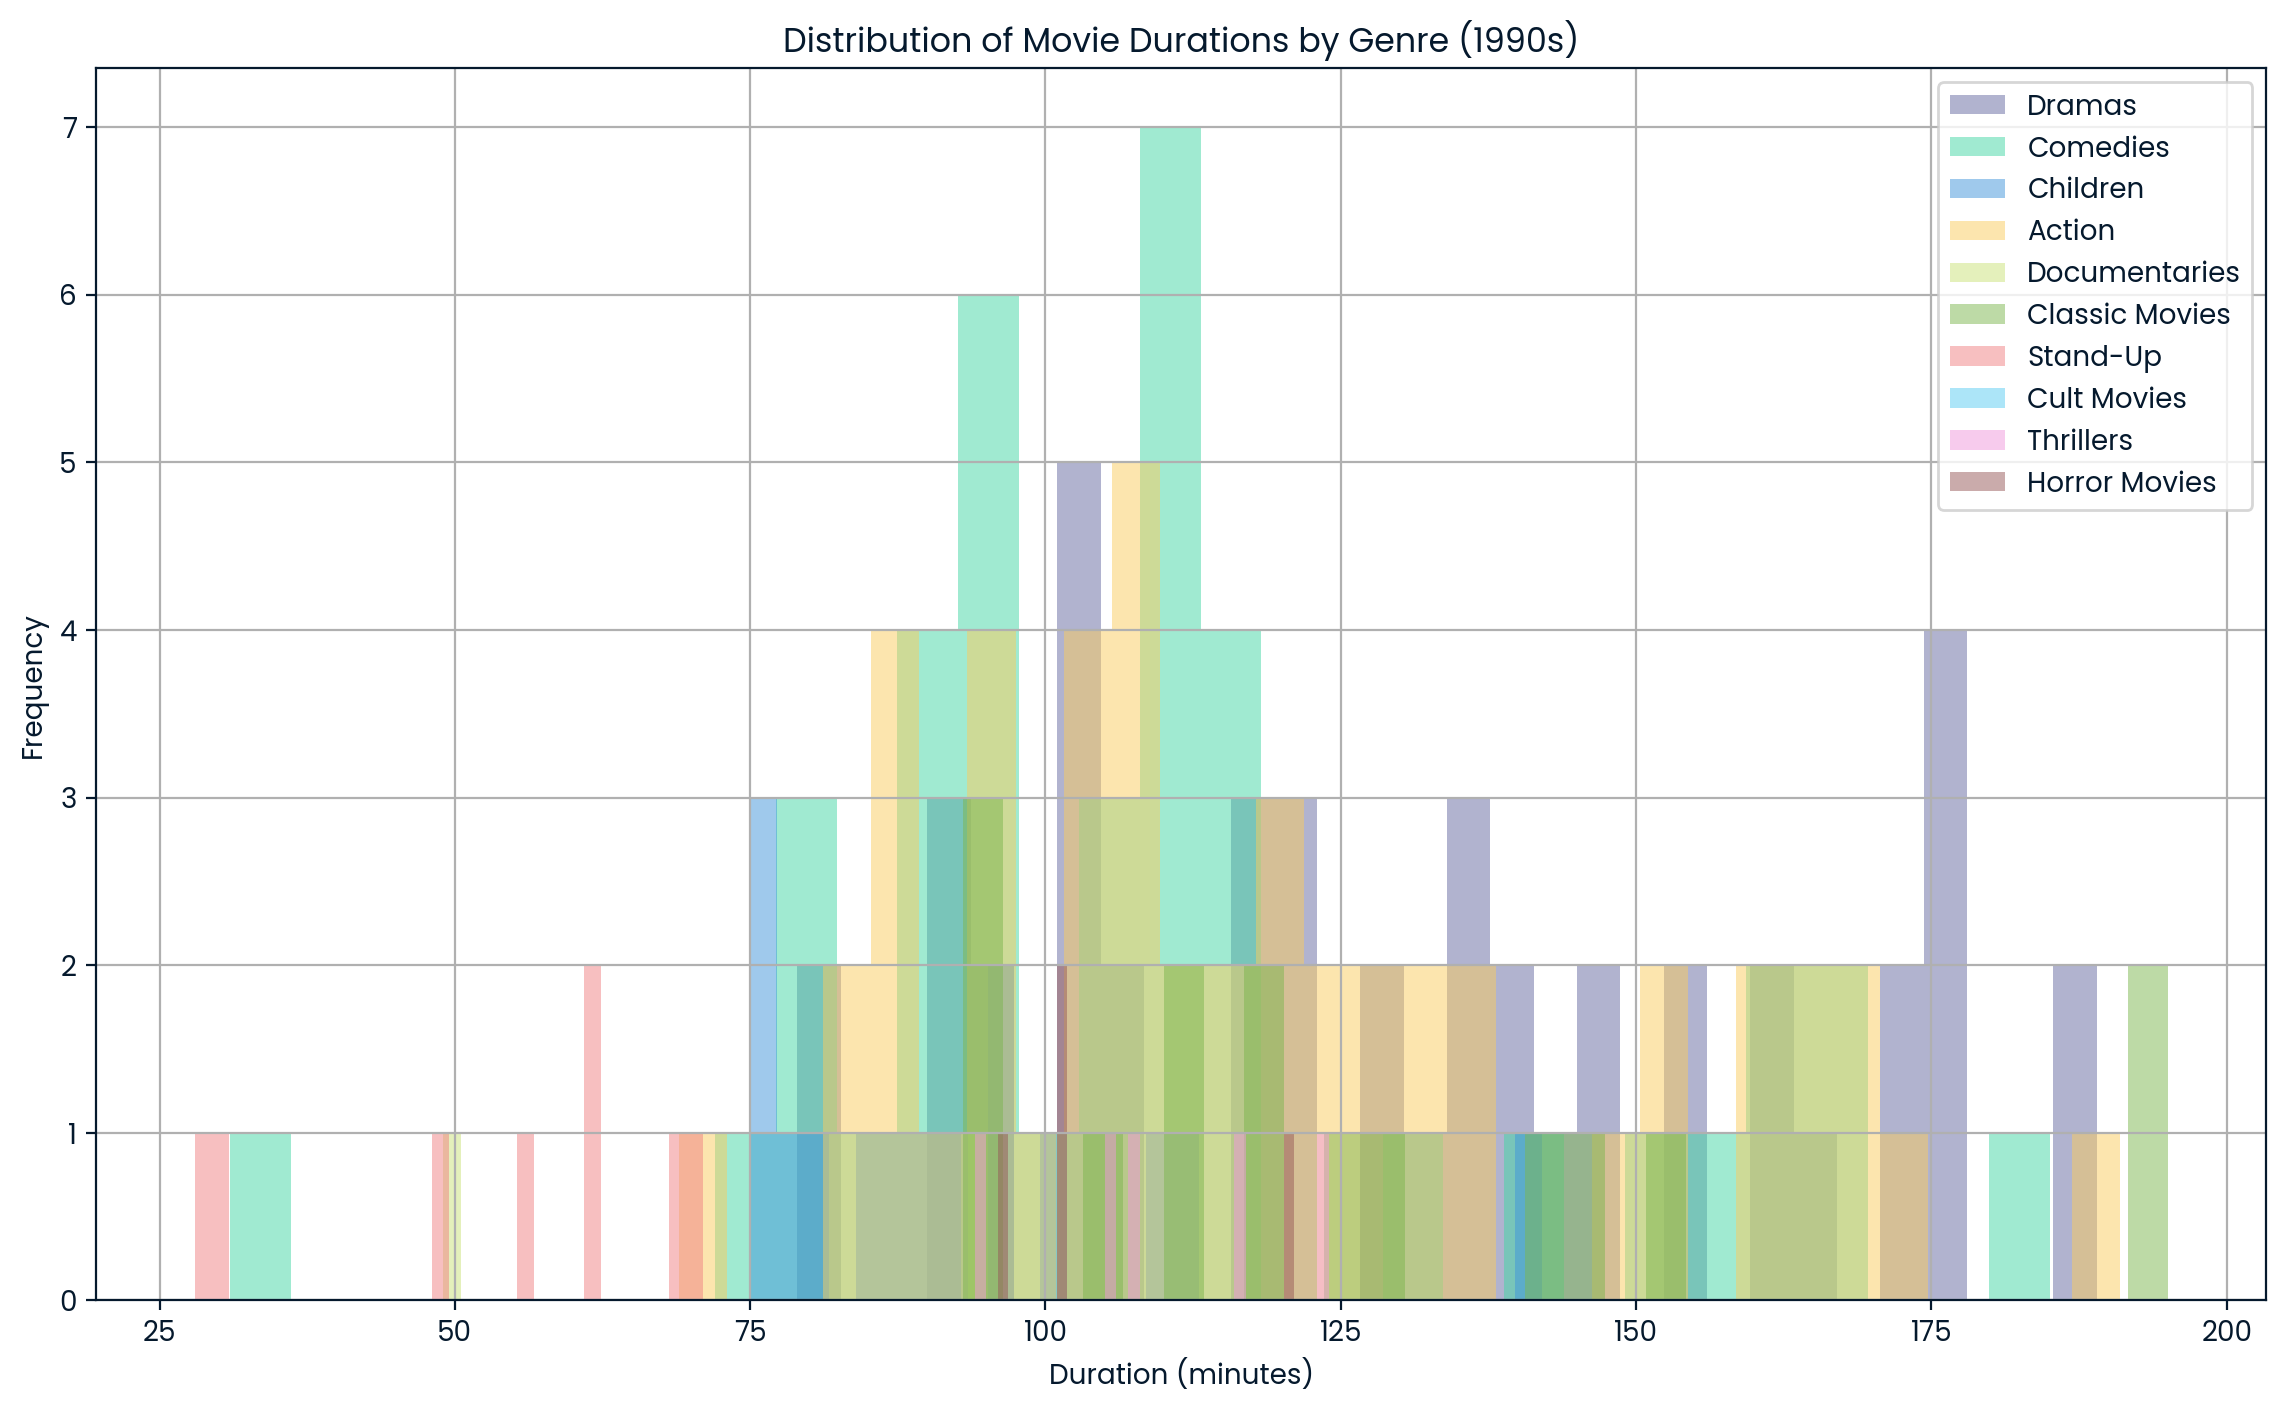

In [43]:
# Detailed duration statistics by genre
duration_by_genre = movies_1990s.groupby('genre')['duration'].describe()

print("\nDuration statistics by genre:")
print(duration_by_genre)

# Plot duration distribution by genre
plt.figure(figsize=(14, 8))
for genre in movies_1990s['genre'].unique():
    subset = movies_1990s[movies_1990s['genre'] == genre]
    plt.hist(subset['duration'], bins=30, alpha=0.5, label=genre)

plt.title('Distribution of Movie Durations by Genre (1990s)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Genre Trends Over Time

<Figure size 1400x800 with 0 Axes>

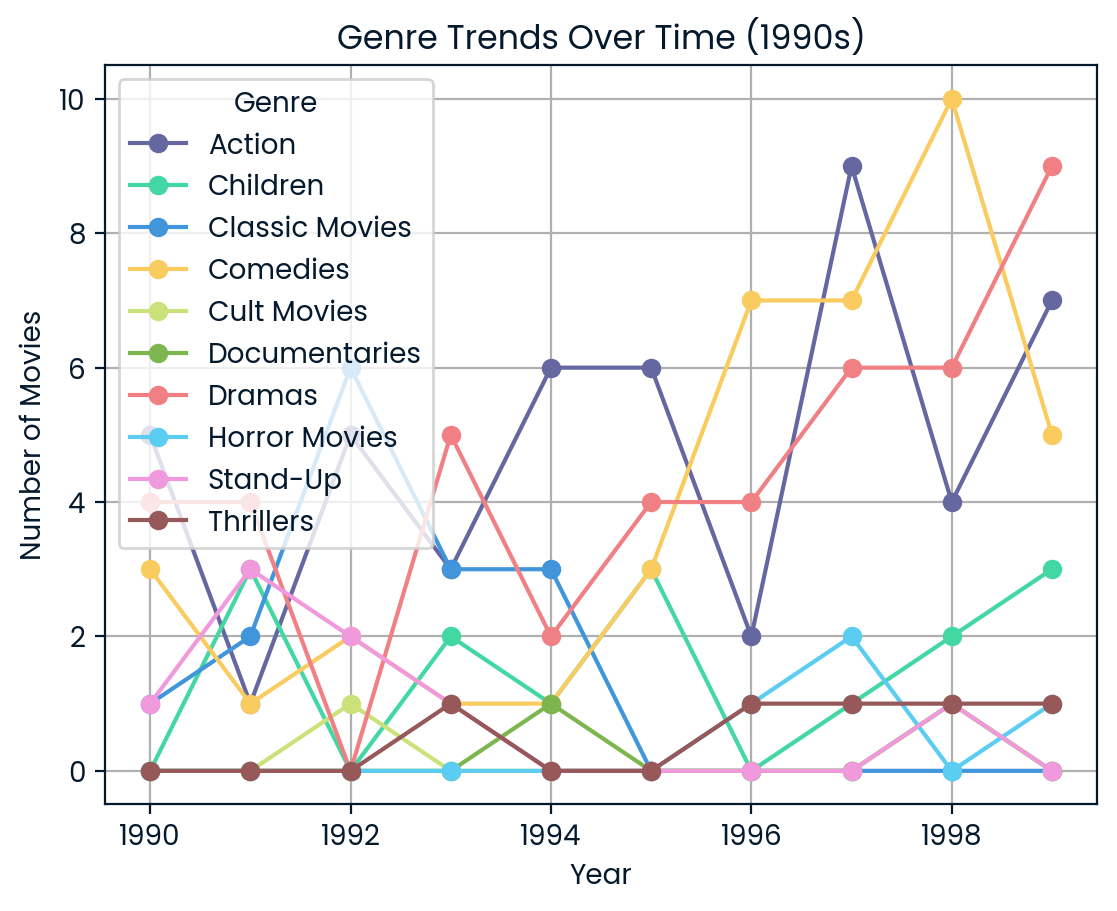

In [44]:
# Count of movies by genre each year
genre_trends = movies_1990s.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Plot genre trends over the 1990s
plt.figure(figsize=(14, 8))
genre_trends.plot(kind='line', marker='o')
plt.title('Genre Trends Over Time (1990s)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.grid(True)
plt.show()


Director and Cast Analysis


Most prolific directors:
Johnnie To            4
Youssef Chahine       3
Umesh Mehra           3
Gregory Hoblit        3
Subhash Ghai          3
Mahesh Bhatt          3
Rajkumar Santoshi     3
Sooraj R. Barjatya    3
David Dhawan          2
Quentin Tarantino     2
Name: director, dtype: int64


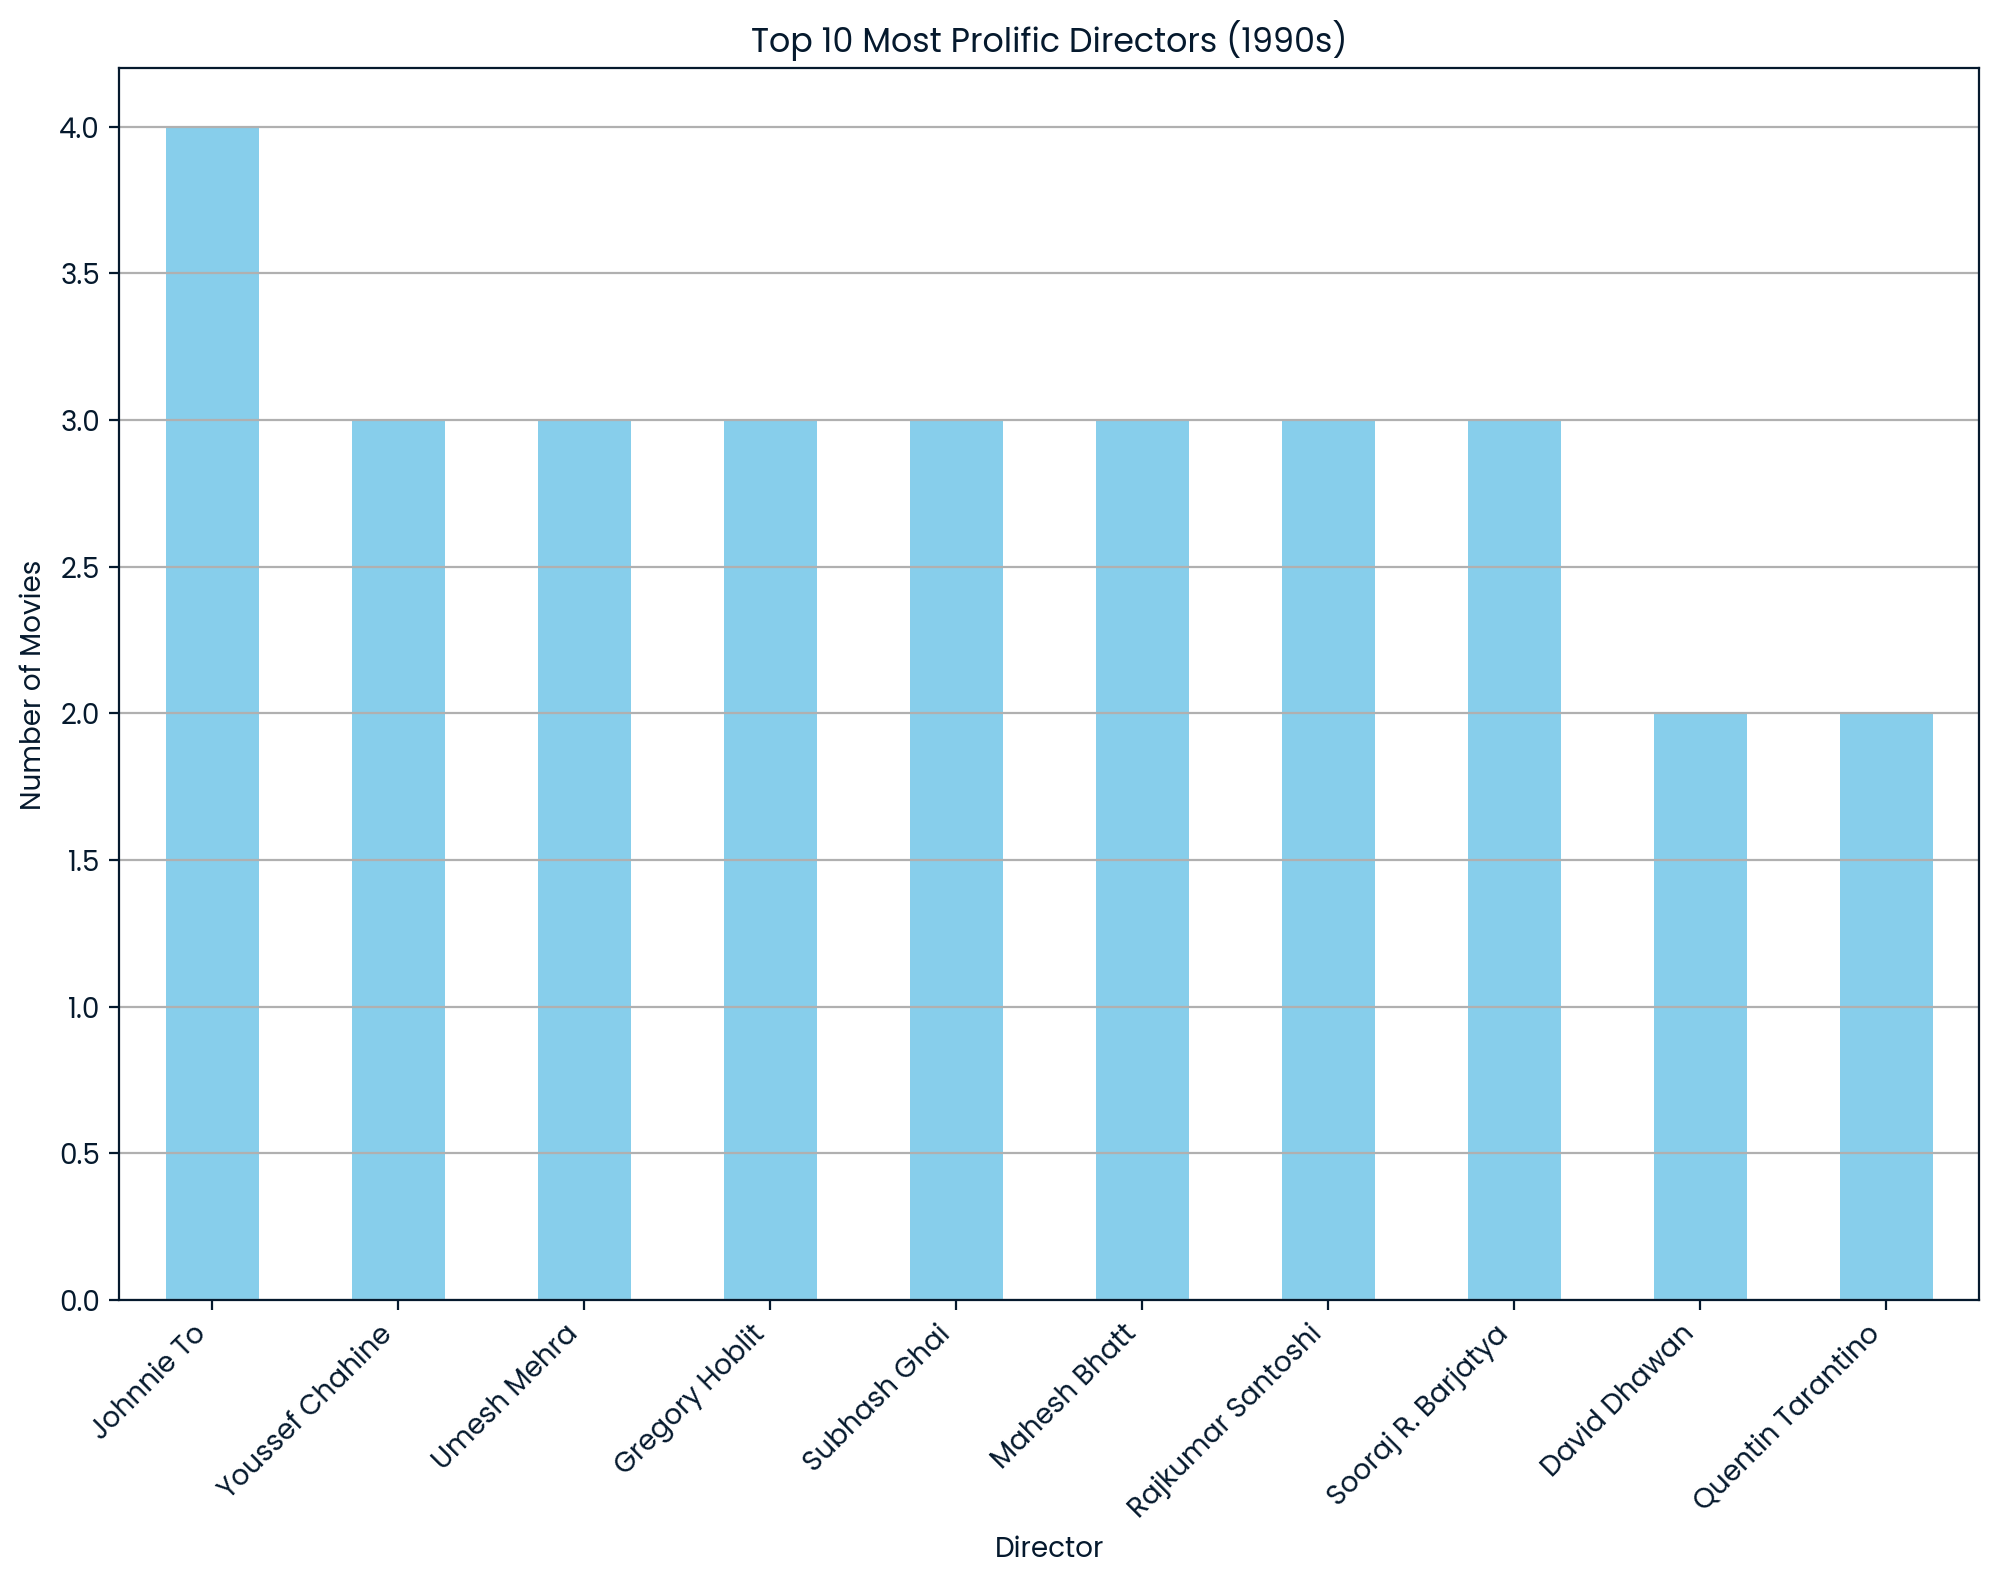


Most frequent cast members:
Shah Rukh Khan    12
Anupam Kher        9
Salman Khan        7
Mohnish Bahl       7
Karisma Kapoor     6
Alok Nath          6
Tinnu Anand        5
Gulshan Grover     5
Reema Lagoo        5
Paresh Rawal       5
dtype: int64


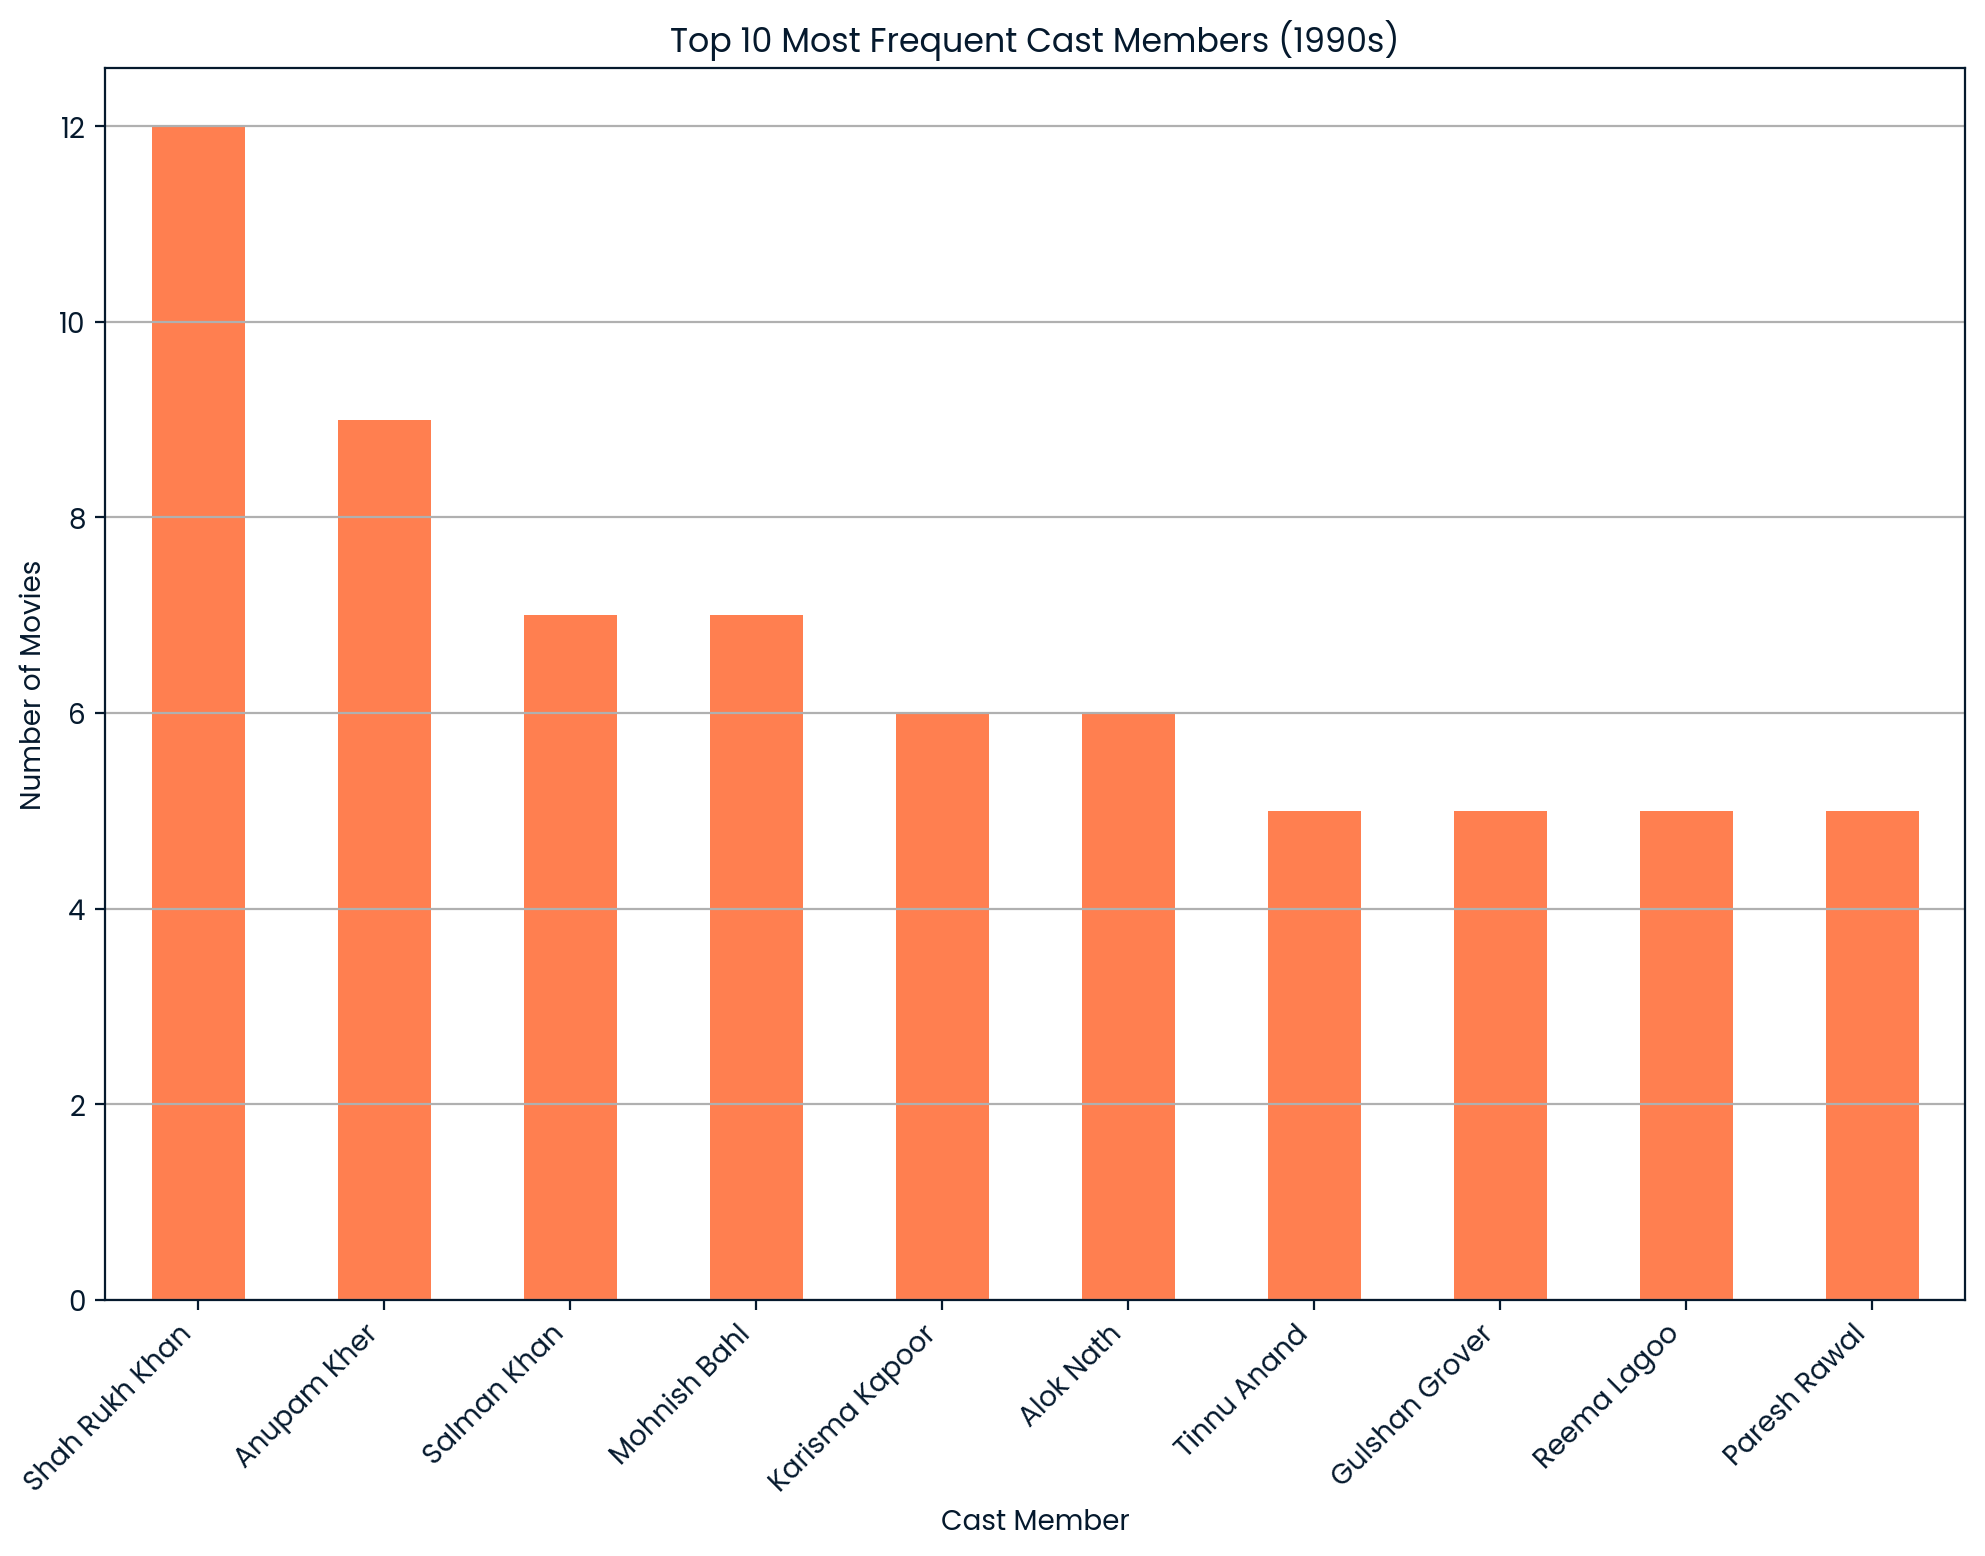

In [45]:
# Most prolific directors
top_directors = movies_1990s['director'].value_counts().head(10)

print("\nMost prolific directors:")
print(top_directors)

# Plot most prolific directors
plt.figure(figsize=(12, 8))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prolific Directors (1990s)')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Most frequent cast members
top_cast = movies_1990s['cast'].str.split(', ', expand=True).stack().value_counts().head(10)

print("\nMost frequent cast members:")
print(top_cast)

# Plot most frequent cast members
plt.figure(figsize=(12, 8))
top_cast.plot(kind='bar', color='coral')
plt.title('Top 10 Most Frequent Cast Members (1990s)')
plt.xlabel('Cast Member')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


Country of Origin Analysis


Distribution of movies by country:
United States     99
India             34
United Kingdom    17
Hong Kong         11
France             5
Australia          5
Mexico             3
Germany            2
Japan              2
Poland             1
Thailand           1
Canada             1
Argentina          1
Egypt              1
Name: country, dtype: int64


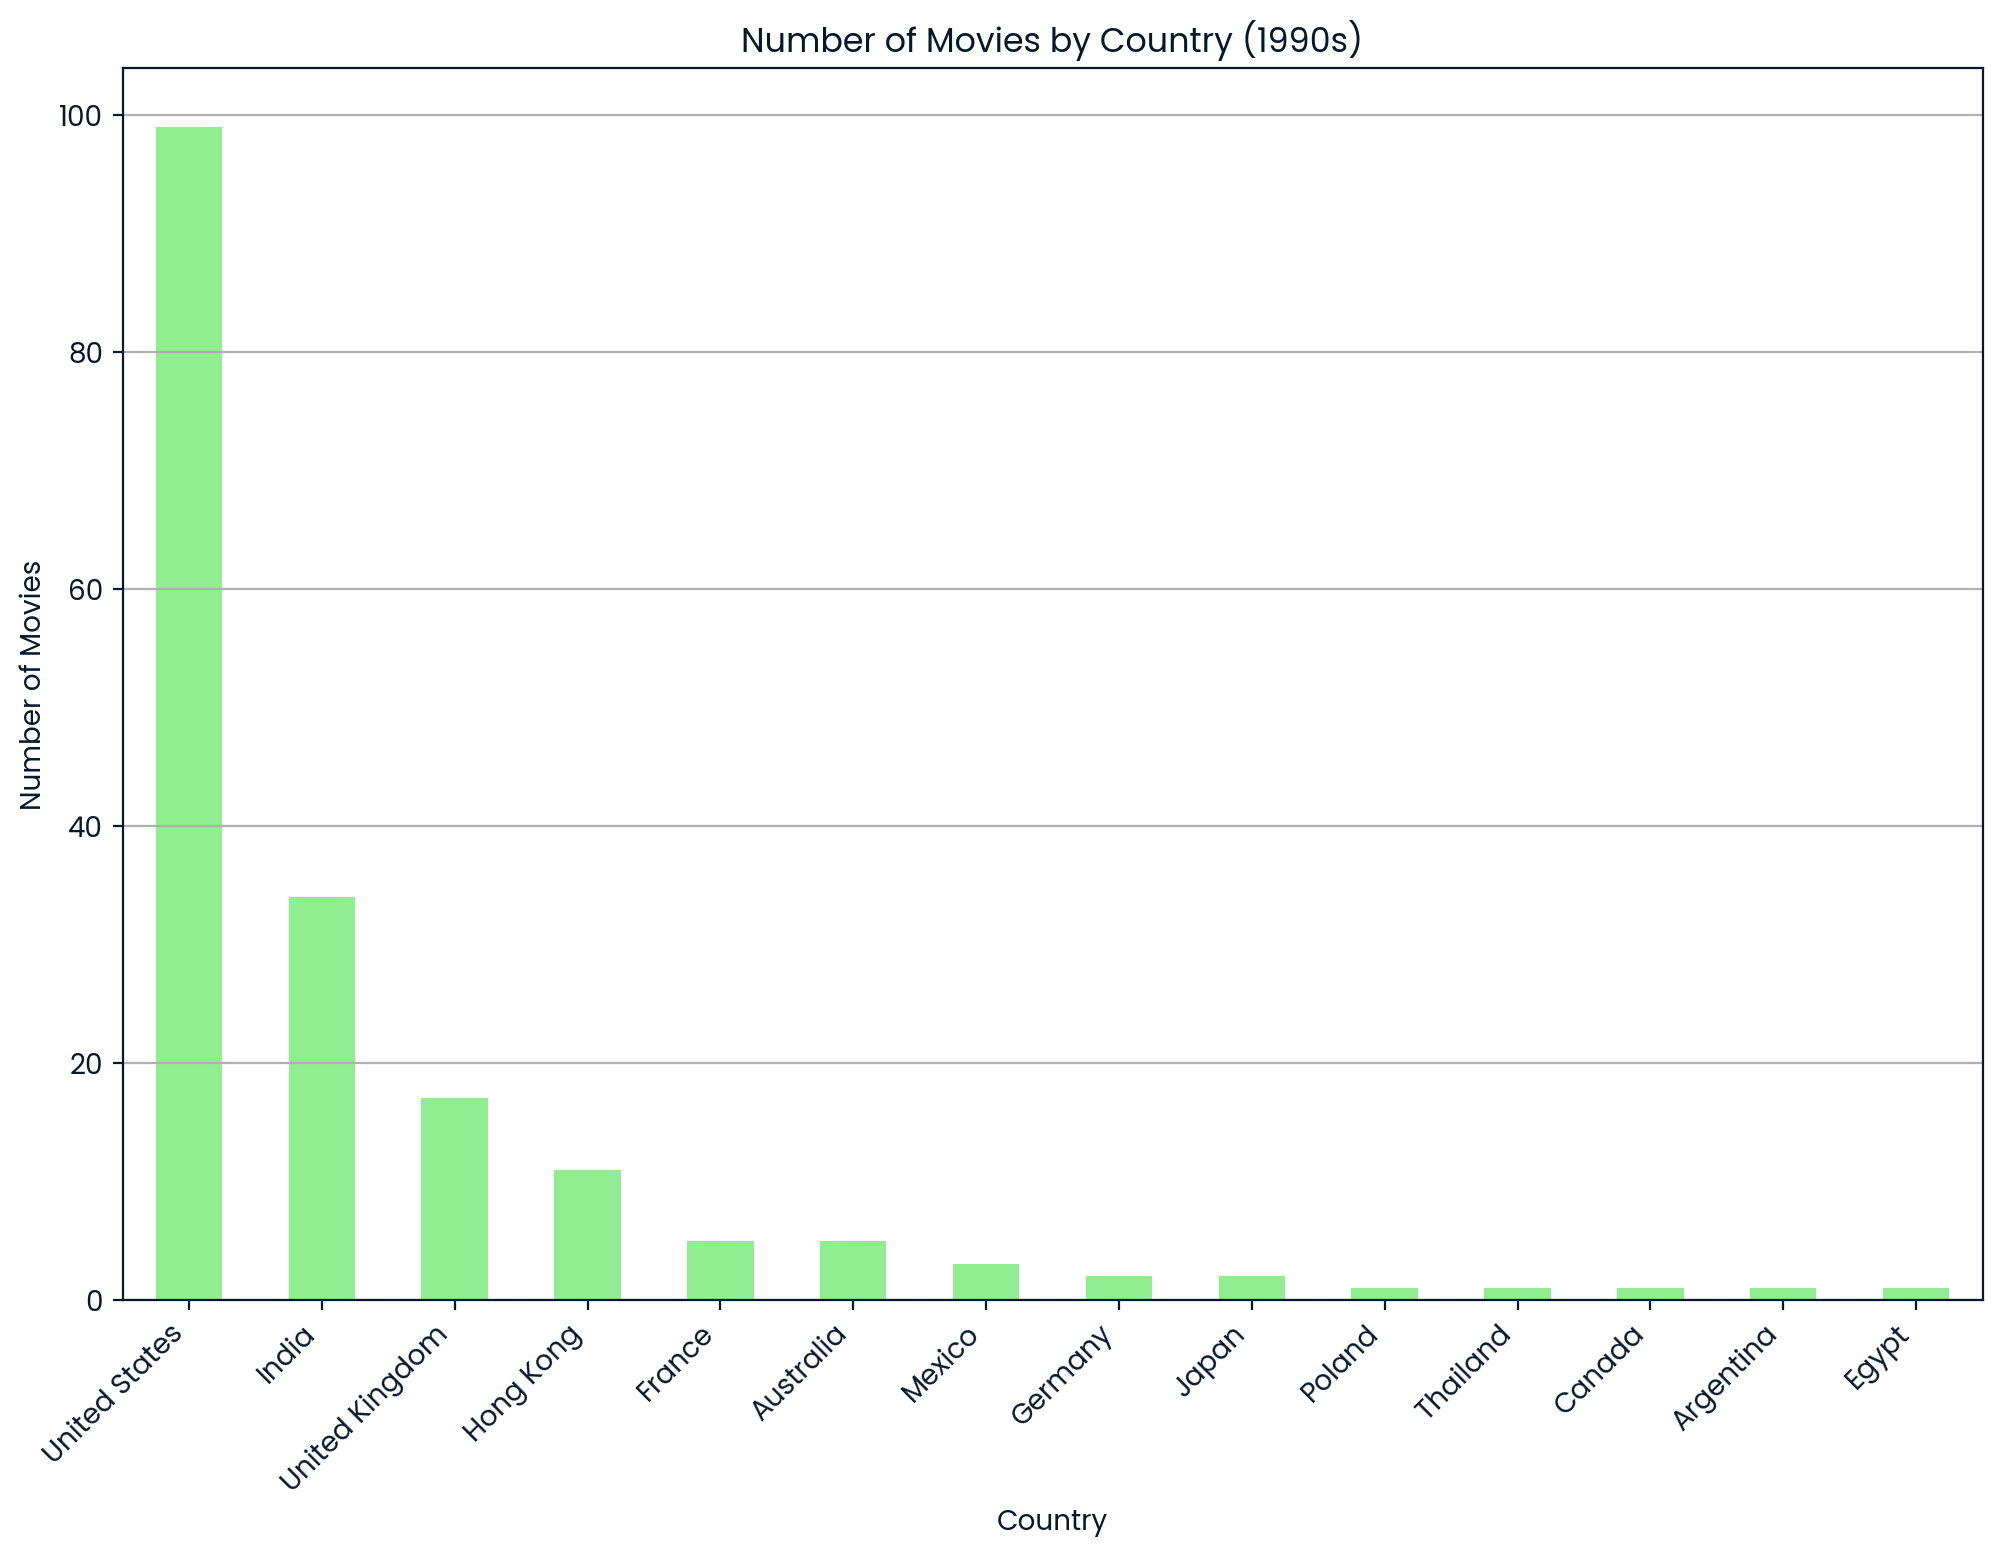


Average duration by country:
country
India             162.852941
Egypt             130.000000
France            112.800000
United States     107.969697
Mexico            103.333333
Australia         102.600000
Thailand          101.000000
United Kingdom     97.058824
Hong Kong          94.363636
Germany            89.500000
Poland             88.000000
Argentina          81.000000
Japan              78.000000
Canada             31.000000
Name: duration, dtype: float64


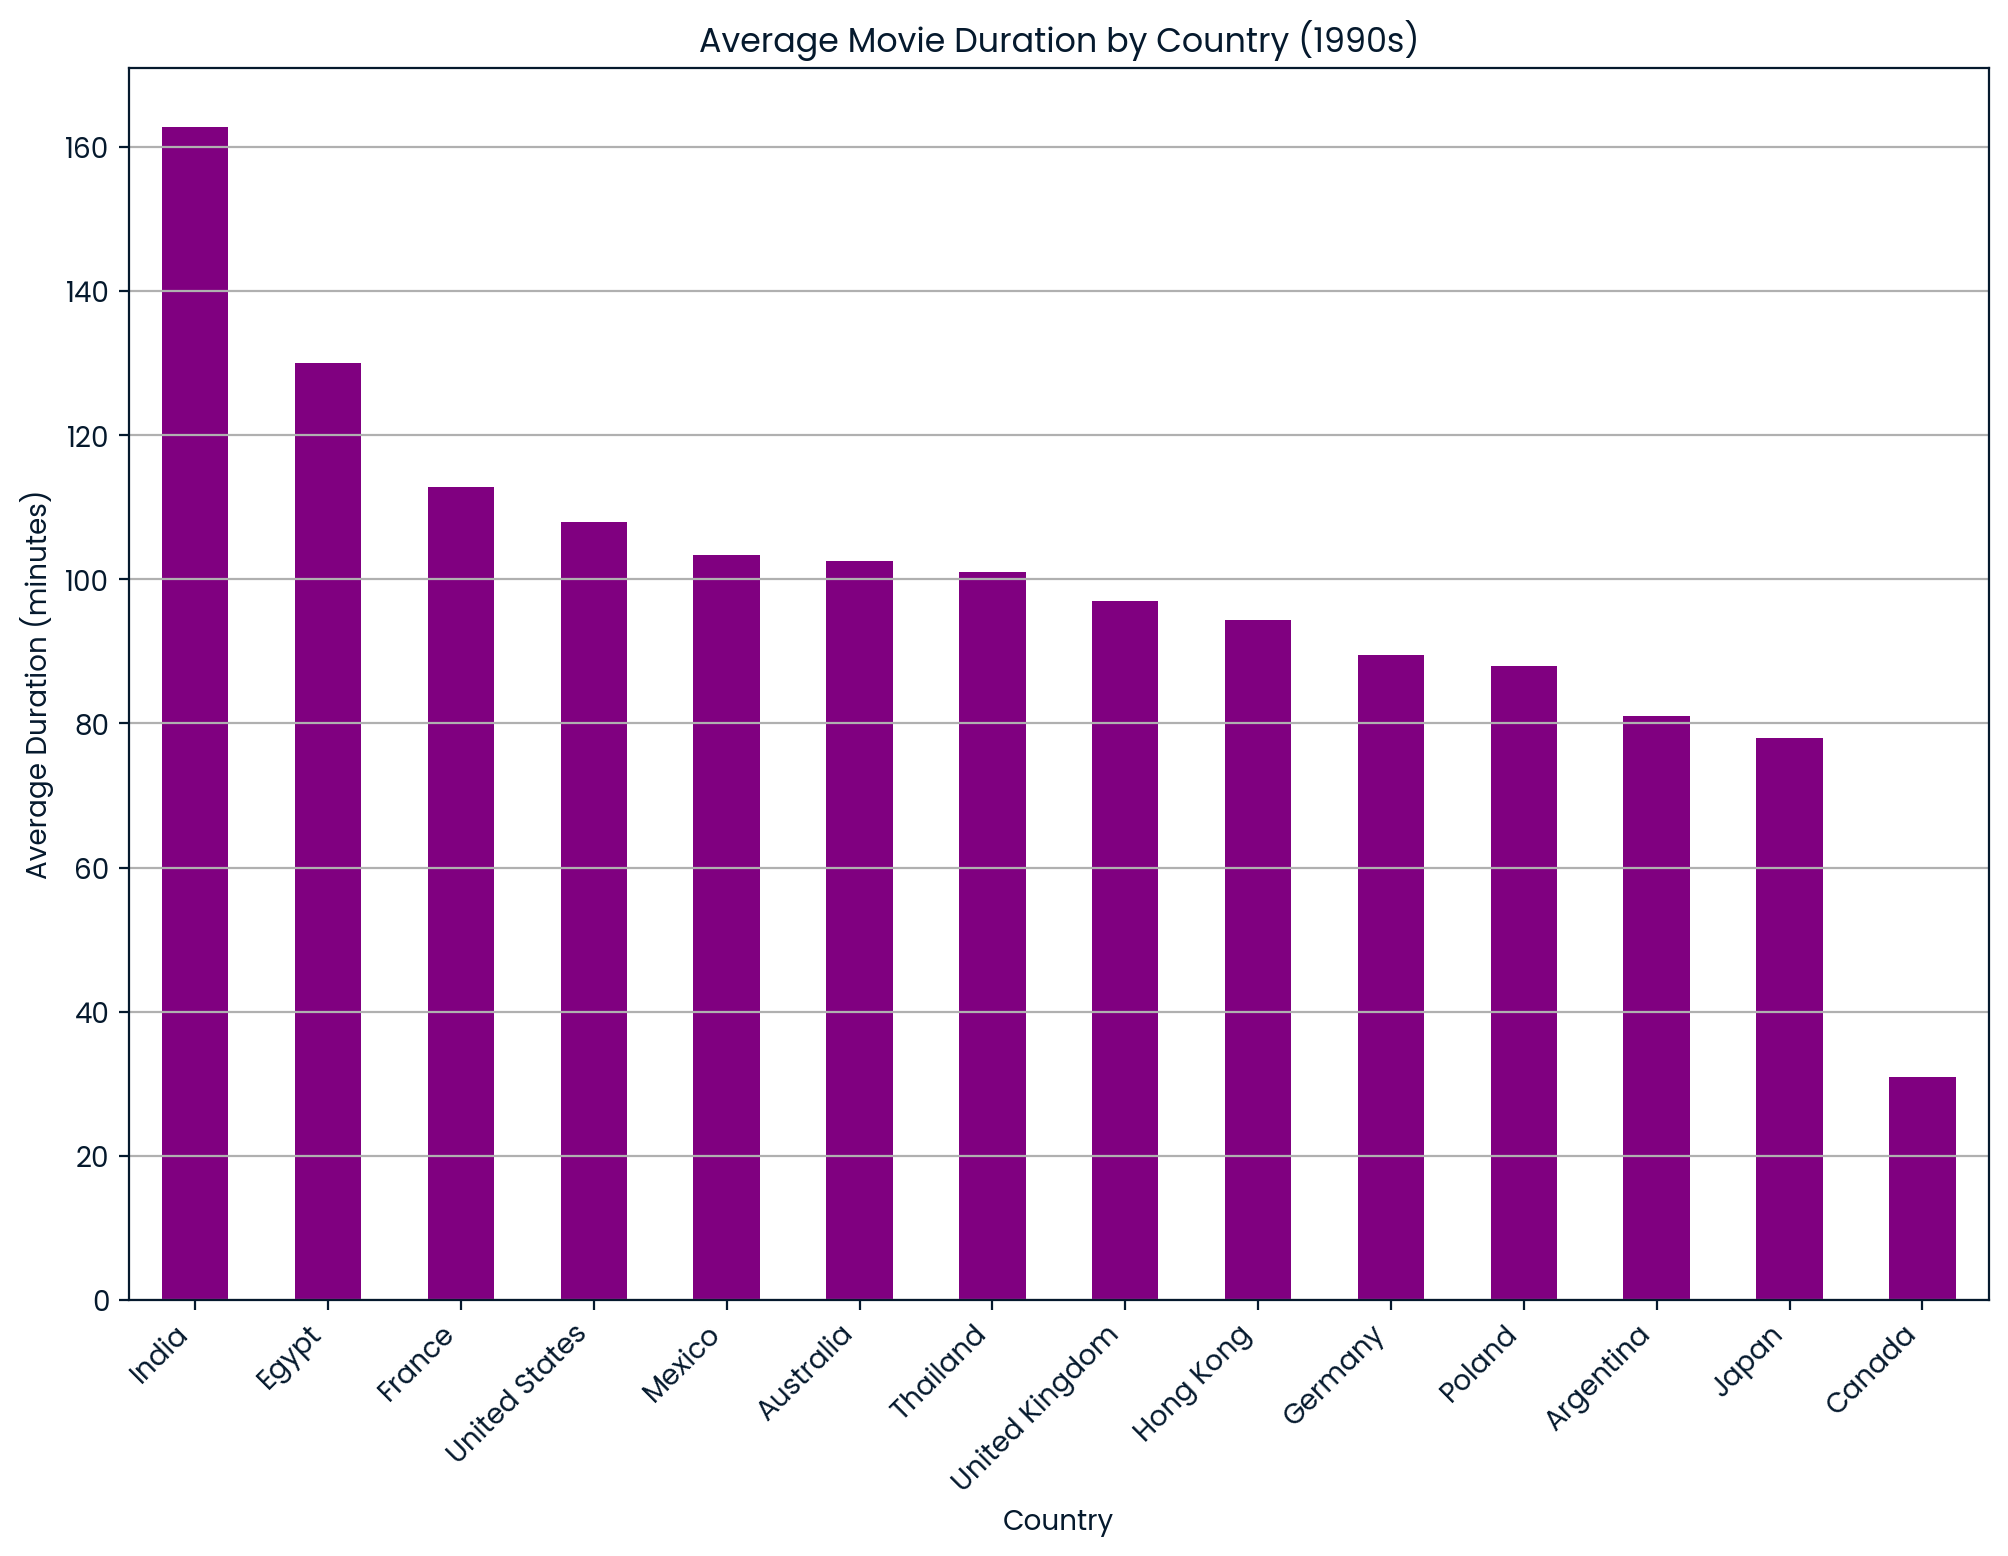

In [46]:
# Distribution of movies by country
country_counts = movies_1990s['country'].value_counts()

print("\nDistribution of movies by country:")
print(country_counts)

# Plot distribution of movies by country
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Movies by Country (1990s)')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Analyze duration by country
duration_by_country = movies_1990s.groupby('country')['duration'].mean().sort_values(ascending=False)

print("\nAverage duration by country:")
print(duration_by_country)

# Plot average duration by country
plt.figure(figsize=(12, 8))
duration_by_country.plot(kind='bar', color='purple')
plt.title('Average Movie Duration by Country (1990s)')
plt.xlabel('Country')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


Description Analysis

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


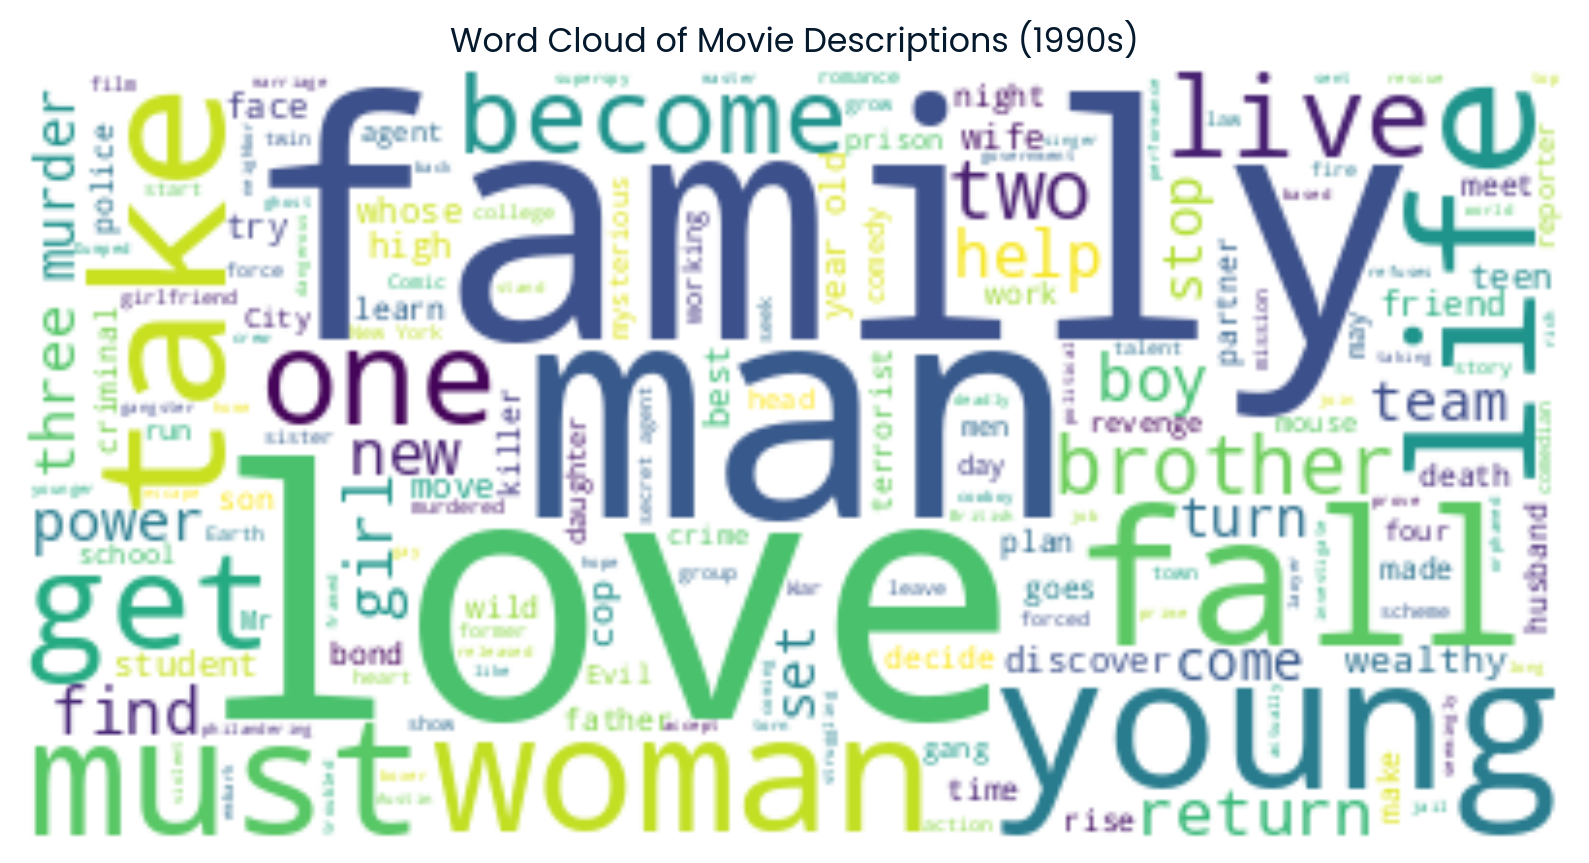

In [47]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combine all descriptions
all_descriptions = ' '.join(movies_1990s['description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(stopwords=set(stopwords.words('english')), background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions (1990s)')
plt.show()
